In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('train-data.csv')
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [3]:
df.drop(["Name","Unnamed: 0","New_Price",], axis = 1, inplace = True)
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [4]:

mileage_df = df["Mileage"].str.split(" ", expand = True)
df["Mileage"] = pd.to_numeric(mileage_df[0], errors = 'coerce')

cc_df = df["Engine"].str.split(" ", expand = True)
df["Engine"] = pd.to_numeric(cc_df[0], errors = 'coerce')

bhp_df = df["Power"].str.split(" ", expand = True)
df["Power"] = pd.to_numeric(bhp_df[0], errors = 'coerce')


In [5]:
df["Mileage"].fillna(df["Mileage"].astype("float64").mean(), inplace = True)

df["Engine"].fillna(df["Engine"].astype("float64").mean(), inplace = True)

df["Power"].fillna(df["Power"].astype("float64").mean(), inplace = True)

df["Seats"].fillna(df["Seats"].astype("float64").mean(), inplace = True)




In [6]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


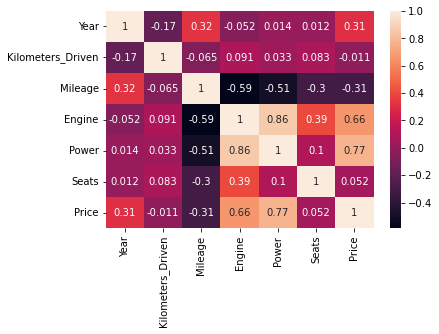

In [7]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [8]:
df["Location"].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [9]:
df["Fuel_Type"].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [10]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:
df["Owner_Type"].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [12]:
def Location_encoder(L):
    if L == 'Mumbai':
            return 0
    elif L== 'Pune' :
            return 1
    elif L == 'Chennai':
            return 2
    elif L == 'Coimbatore':
            return 3
    elif L == 'Hyderabad':
            return 4
    elif L == 'Jaipur':
            return 5
    elif L== 'Kochi' :
            return 6
    elif L =='Kolkata' :
            return 7
    elif L == 'Delhi':
            return 8
    elif L =='Bangalore':
            return 9
    elif L == 'Ahmedabad':
            return 10
    else:
            return 11

In [13]:
def Fueltype_encoder(f):
    if f == 'CNG':
            return 0
    elif f =='Diesel':
            return 1
    elif f =='Petrol':
            return 2
    elif f =='LPG':
            return 3
    elif f =='Electric':
            return 4
    else: 
            return 6

In [14]:
def Transmission_encoder(t):
    if t == 'Manual':
            return 0
    elif t =='Automatic' :
            return 1
    else:
            return 2

In [15]:
def Ownertype_encoder(o):
    if o == 'First':
            return 0
    elif o =='Second':
            return 1
    elif o == 'Third':
            return 2
    elif o == 'Fourth & Above':
            return 3
    else: 
            return 4

In [16]:
Location_enc= df['Location'].map(Location_encoder)
Transmission_enc= df['Transmission'].map(Transmission_encoder)
Ownertype_enc=df['Owner_Type'].map(Ownertype_encoder)
Fueltype_enc= df['Fuel_Type'].map(Fueltype_encoder)

In [17]:
df_enc = df
df_enc['Location'] = Location_enc
df_enc['Fuel_Type'] = Fueltype_enc
df_enc['Transmission'] = Transmission_enc
df_enc['Owner_Type'] =Ownertype_enc
df_enc.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,2010,72000,0,0,0,26.60,998.0,58.16,5.0,1.75
1,1,2015,41000,1,0,0,19.67,1582.0,126.20,5.0,12.50
2,2,2011,46000,2,0,0,18.20,1199.0,88.70,5.0,4.50
3,2,2012,87000,1,0,0,20.77,1248.0,88.76,7.0,6.00
4,3,2013,40670,1,1,1,15.20,1968.0,140.80,5.0,17.74


In [18]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,2010,72000,0,0,0,26.60,998.0,58.16,5.0,1.75
1,1,2015,41000,1,0,0,19.67,1582.0,126.20,5.0,12.50
2,2,2011,46000,2,0,0,18.20,1199.0,88.70,5.0,4.50
3,2,2012,87000,1,0,0,20.77,1248.0,88.76,7.0,6.00
4,3,2013,40670,1,1,1,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,8,2014,27365,1,0,0,28.40,1248.0,74.00,5.0,4.75
6015,5,2015,100000,1,0,0,24.40,1120.0,71.00,5.0,4.00
6016,5,2012,55000,1,0,1,14.00,2498.0,112.00,8.0,2.90
6017,7,2013,46000,2,0,0,18.90,998.0,67.10,5.0,2.65


In [19]:
x = df.iloc[:, :-1]
x


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0,2010,72000,0,0,0,26.60,998.0,58.16,5.0
1,1,2015,41000,1,0,0,19.67,1582.0,126.20,5.0
2,2,2011,46000,2,0,0,18.20,1199.0,88.70,5.0
3,2,2012,87000,1,0,0,20.77,1248.0,88.76,7.0
4,3,2013,40670,1,1,1,15.20,1968.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...
6014,8,2014,27365,1,0,0,28.40,1248.0,74.00,5.0
6015,5,2015,100000,1,0,0,24.40,1120.0,71.00,5.0
6016,5,2012,55000,1,0,1,14.00,2498.0,112.00,8.0
6017,7,2013,46000,2,0,0,18.90,998.0,67.10,5.0


In [20]:
y = df.iloc[:, -1]
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 4201 to 860
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           4213 non-null   int64  
 1   Year               4213 non-null   int64  
 2   Kilometers_Driven  4213 non-null   int64  
 3   Fuel_Type          4213 non-null   int64  
 4   Transmission       4213 non-null   int64  
 5   Owner_Type         4213 non-null   int64  
 6   Mileage            4213 non-null   float64
 7   Engine             4213 non-null   float64
 8   Power              4213 non-null   float64
 9   Seats              4213 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 362.1 KB


In [23]:
X_train = X_train.iloc[:, 0:]
X_train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
4201,5,2011,77000,1,0,0,22.07,1199.0,73.9,5.0
4383,4,2016,19947,2,0,0,20.36,1197.0,78.9,5.0
1779,6,2014,70963,1,0,0,15.10,2179.0,140.0,7.0
4020,7,2013,115195,1,0,0,25.20,1248.0,74.0,5.0
3248,6,2011,58752,2,0,0,16.47,1198.0,73.9,5.0
...,...,...,...,...,...,...,...,...,...,...
3772,2,2015,27000,2,1,0,17.97,1498.0,99.6,5.0
5191,2,2019,9000,1,1,0,12.62,2198.0,158.0,7.0
5226,4,2013,140000,1,0,1,15.10,2179.0,140.0,7.0
5390,5,2014,76414,1,0,0,25.80,1498.0,98.6,5.0


In [24]:

X_test = X_test.iloc[:, 0:]
X_test

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
2868,4,2013,69000,1,0,0,23.40,1248.00000,74.00000,5.000000
5924,6,2017,26741,1,0,0,15.40,1997.00000,120.00000,7.000000
3764,8,2014,86000,1,0,0,15.10,2179.00000,140.00000,7.000000
4144,1,2016,52000,1,0,1,25.00,1396.00000,69.01000,5.000000
2780,1,2009,100000,2,0,0,0.00,1621.27645,113.25305,5.278735
...,...,...,...,...,...,...,...,...,...,...
2576,6,2014,91586,1,1,1,11.18,2696.00000,184.00000,7.000000
1294,8,2009,55005,2,0,0,12.80,1621.27645,113.25305,5.278735
1876,7,2014,48800,2,0,0,19.10,1197.00000,85.80000,5.000000
1432,3,2017,25095,2,0,0,18.16,1196.00000,86.80000,5.000000


In [25]:
y_test

2868     5.75
5924    10.08
3764     7.85
4144     2.40
2780     1.60
        ...  
2576     9.47
1294     3.20
1876     4.25
1432     6.48
3926     5.91
Name: Price, Length: 1806, dtype: float64

In [26]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

In [27]:
# standardScaler = StandardScaler()
# standardScaler.fit(X_train)
# X_train = standardScaler.transform(X_train)
# X_test = standardScaler.transform(X_test)


In [28]:
# linearRegression = LinearRegression()
# linearRegression.fit(X_train, y_train)
# y_pred = linearRegression.predict(X_test)
# r2_score(y_test, y_pred)

In [29]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8716444926743554

In [30]:
diff  = pd.DataFrame({'actual':y_test, 'pred':y_pred})
diff

,actual,pred
2868,5.75,5.5187
5924,10.08,13.2517
3764,7.85,7.7214
4144,2.40,2.3146
2780,1.60,24.0840
...,...,...
2576,9.47,12.3901
1294,3.20,4.3453
1876,4.25,3.5803
1432,6.48,5.7254


In [31]:
import pickle

with open('model_rf.pickle', 'wb') as f:
    pickle.dump(rf,f)

In [32]:
with open('model_rf.pickle','rb') as f:
    model = pickle.load(f)


In [33]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# scaled = sc.fit_transform(np.array([[1,2016,52000,1,0,1,25.00,1396.00000,69.01000,5.000000]]))

rf.predict(np.array([[0,2017,19000,1,0,0,26.80,1248.00000,74.00000,5.000000]]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.2414])

In [34]:
import warnings
warnings.filterwarnings('ignore')
rf.predict(np.array([[0,2017,19000,1,0,0,26.80,1248,74,5]]))

array([1.2414])

In [36]:
rf.predict(np.array([[4,2013,69000,1,0,0,23.40,1248.00000,74.00000,5.000000]]))

array([1.3084])